## MOwNiT - laboratorium 11
### Teoria chaosu
https://github.com/piotrMocz/mownit2/blob/master/Chaos.ipynb

### Zadanie

Napisz program, który będzie rysował trajektorię dla któregoś z chaotycznych atraktorów: Lorenza, Roeslera, Kuramoto-Shivashinsky'ego (lub innych znalezionych). Rozwiązanie wymaga rozwiązania równania różniczkowego. W Pythonie można to zrobić np. funkcją [`odeint` z pakietu SciPy](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint).

Wielkim plusem będzie interaktywność programu: warto zbadać, czy układ ma chaotyczne właściwości dla wszystkich zestawów parametrów, czy tylko dla pewnego ich podzbioru.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## 1. Lorenz system
(źródło: https://en.wikipedia.org/wiki/Lorenz_system)

$
{\begin{aligned}{\frac {\mathrm {d} x}{\mathrm {d} t}}&=\sigma (y-x),\\{\frac {\mathrm {d} y}{\mathrm {d} t}}&=x(\rho -z)-y,\\{\frac {\mathrm {d} z}{\mathrm {d} t}}&=xy-\beta z.\end{aligned}}
$

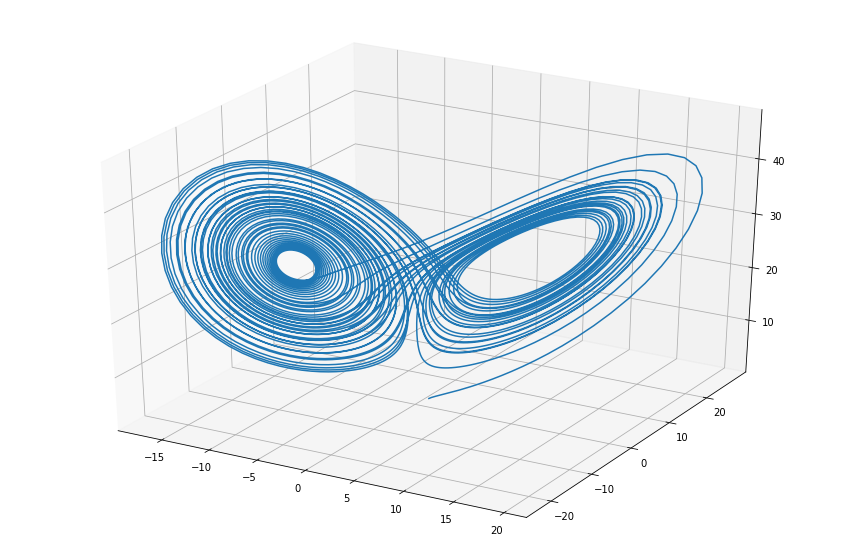

In [47]:
# parameters
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
  x, y, z = state  # unpack the state vector
  return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # derivatives

state0 = [1.0, 1.05, 1.0]
t = np.arange(0.0, 50.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
ax.plot(states[:,0], states[:,1], states[:,2])
plt.show()

## 2. Lorenz 96 model
(źródło: https://en.wikipedia.org/wiki/Lorenz_96_model)

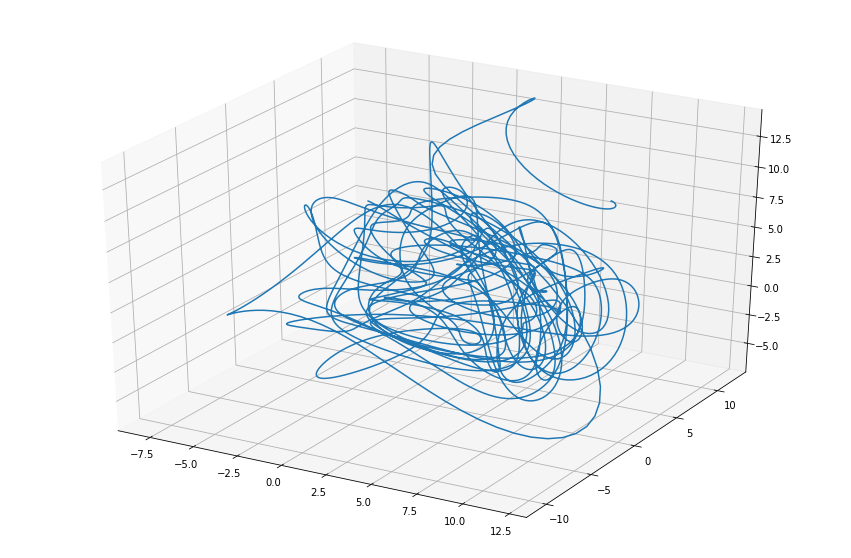

In [44]:
# these are our constants
N = 36  # number of variables
F = 8  # forcing

def Lorenz96(x,t):

  # compute state derivatives
  d = np.zeros(N)
  # first the 3 edge cases: i=1,2,N
  d[0] = (x[1] - x[N-2]) * x[N-1] - x[0]
  d[1] = (x[2] - x[N-1]) * x[0]- x[1]
  d[N-1] = (x[0] - x[N-3]) * x[N-2] - x[N-1]
  # then the general case
  for i in range(2, N-1):
      d[i] = (x[i+1] - x[i-2]) * x[i-1] - x[i]
  # add the forcing term
  d = d + F

  # return the state derivatives
  return d

x0 = F*np.ones(N) # initial state (equilibrium)
x0[19] += 0.01 # add small perturbation to 20th variable
t = np.arange(0.0, 40.0, 0.01)

x = odeint(Lorenz96, x0, t)

# plot first three variables
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
ax.plot(x[:,0],x[:,1],x[:,2])
plt.show()

## 3. Rössler attractor
(źródło: https://en.wikipedia.org/wiki/R%C3%B6ssler_attractor)

$
{\begin{aligned}{\frac {\mathrm {d} x}{\mathrm {d} t}}&=-y-z,\\{\frac {\mathrm {d} y}{\mathrm {d} t}}&=x+ ay,\\{\frac {\mathrm {d} z}{\mathrm {d} t}}&=b+z(x-c).\end{aligned}}
$

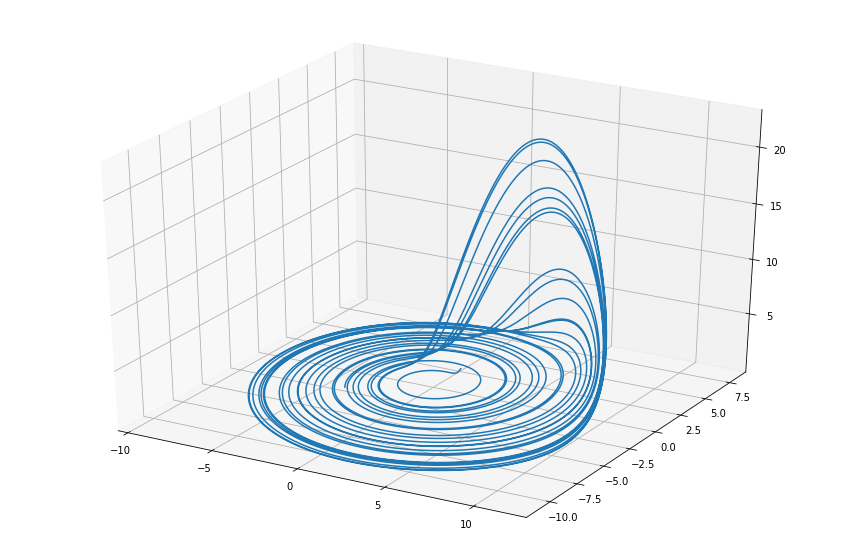

In [63]:
# parameters
a = 0.2
b = 0.2
c = 5.7

def f(state, t):
  x, y, z = state  # unpack the state vector
  return (- y - z), x + a * y, b + z * (x - c)  # derivatives

state0 = [1.0, 1.0, 1.01]
t = np.arange(0.0, 150.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
ax.plot(states[:,0], states[:,1], states[:,2])
plt.show()

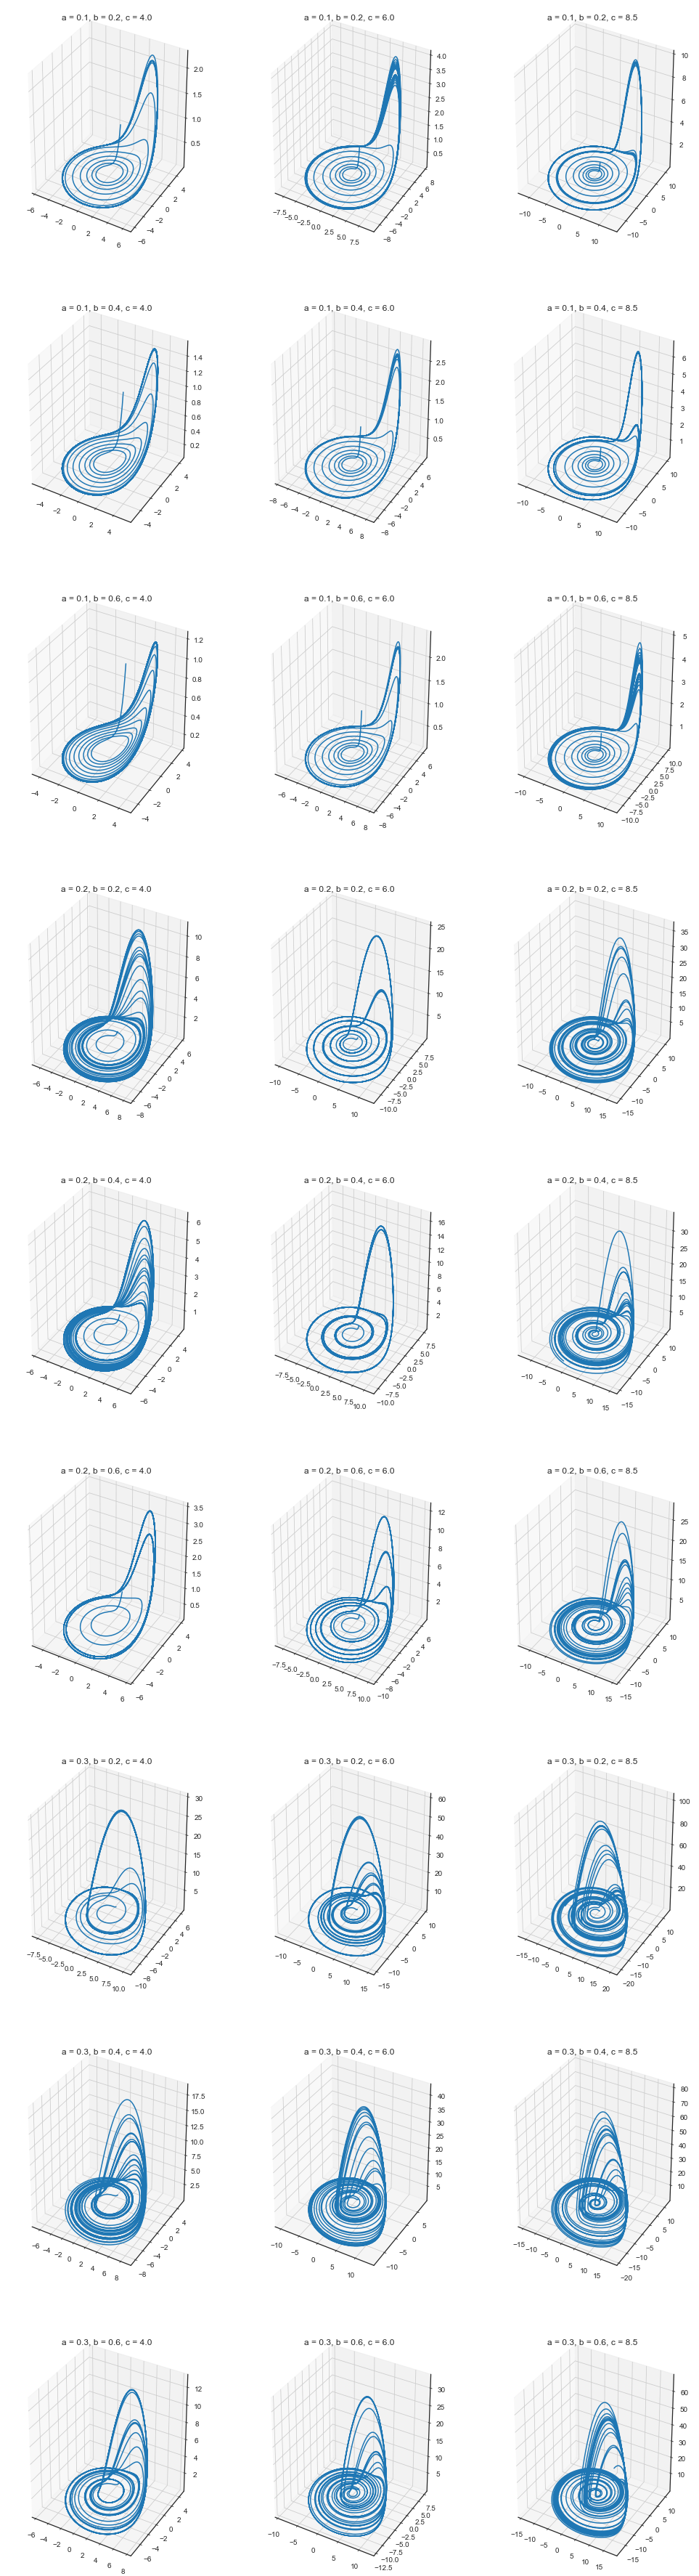

In [89]:
def test_parameters(a, b, c):
    def f(state, t):
      x, y, z = state  # unpack the state vector
      return (- y - z), x + a * y, b + z * (x - c)  # derivatives

    state0 = [1.0, 1.0, 1.01]
    t = np.arange(0.0, 150.0, 0.01)

    states = odeint(f, state0, t)

    subtitle = "a = " + str(a) + ", b = " + str(b) + ", c = " + str(c)
    ax = fig.add_subplot(9, 3, i, projection='3d')
    ax.set_title(subtitle)
    ax.plot(states[:,0], states[:,1], states[:,2])
    
    
A = [0.1, 0.2, 0.3]
B = [0.2, 0.4, 0.6]
C = [4.0, 6.0, 8.5]
i = 1

fig = plt.figure(figsize=(17,65))
#fig.subplots_adjust(hspace=0.4, wspace=0.4)

for a in A:
    for b in B:
        for c in C:
            test_parameters(a, b, c)
            i += 1
plt.show()